# [Lab Session 2](otsu.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [2]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")

**[Task 1.2.]()** Quantify the image into 256 bins:

In [4]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

<BarContainer object of 256 artists>

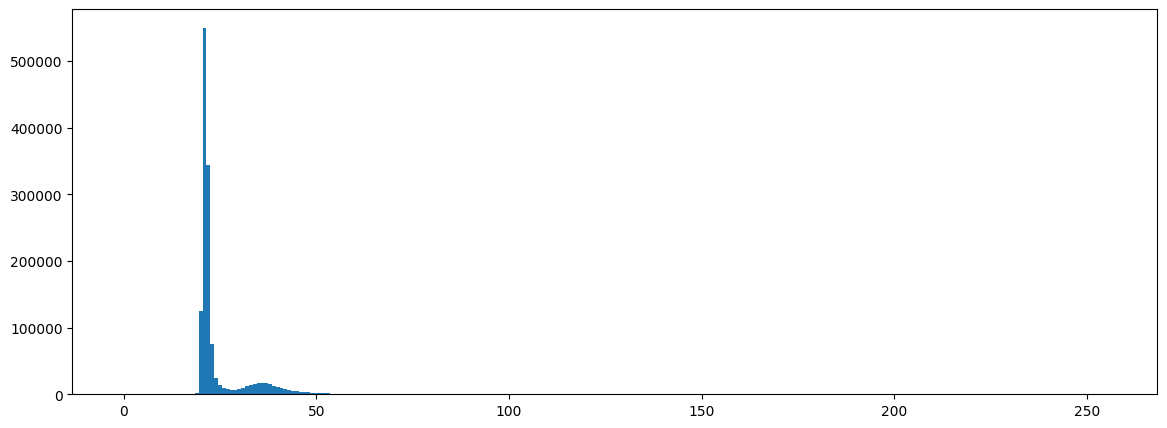

In [9]:

hist = np.zeros(256, dtype=int)
for i in range(256) :
    hist[i] = np.sum(img8 == i)
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

Show the computed histogram:

<BarContainer object of 256 artists>

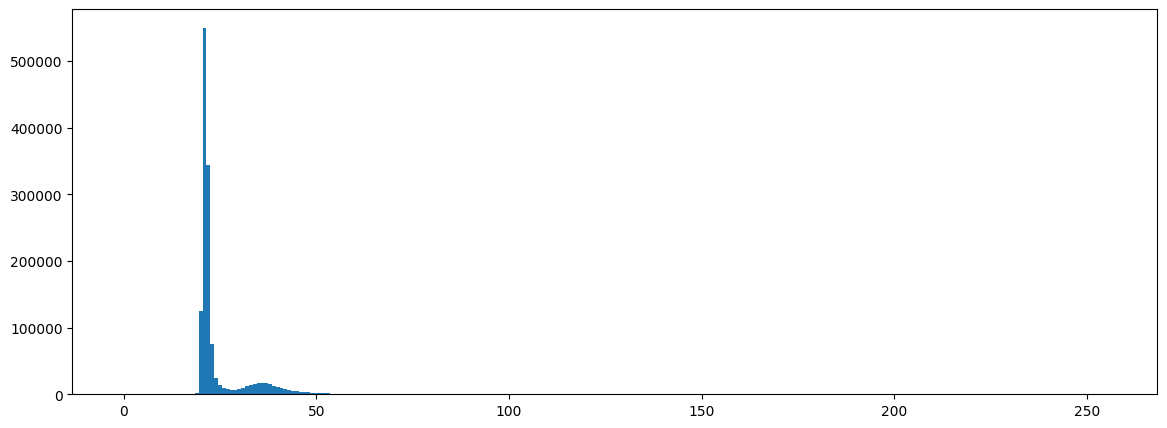

In [7]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [14]:

# Total number of pixels
total_pixels = np.sum(hist)
intensity_levels = np.arange(256)

# Precompute cumulative sums and means
cumulative_sum = np.cumsum(hist)
cumulative_mean = np.cumsum(hist * intensity_levels)
global_mean = cumulative_mean[-1] / total_pixels

# Initialize variables for Otsu's thresholding
min_within_class_variance = float('inf')
optimal_threshold = 0

# Loop through all possible thresholds (T = 1 to 255)
for T in range(1, 256):
    # Class 1 (0 to T-1)
    n1 = cumulative_sum[T - 1]  # Number of pixels in class 1
    if n1 == 0:
        continue
    mean1 = cumulative_mean[T - 1] / n1  # Mean of class 1

    # Class 2 (T to 255)
    n2 = total_pixels - n1  # Number of pixels in class 2
    if n2 == 0:
        continue
    mean2 = (global_mean * total_pixels - cumulative_mean[T - 1]) / n2  # Mean of class 2

    # Within-class variance for class 1
    var1 = np.sum(hist[:T] * (intensity_levels[:T] - mean1) ** 2) / n1
    # Within-class variance for class 2
    var2 = np.sum(hist[T:] * (intensity_levels[T:] - mean2) ** 2) / n2

    # Total within-class variance
    within_class_variance = n1 * var1 + n2 * var2

    # Update optimal threshold if within-class variance is minimized
    if within_class_variance < min_within_class_variance:
        min_within_class_variance = within_class_variance
        optimal_threshold = T

print(f"Optimal Threshold: {optimal_threshold}")





Optimal Threshold: 31


**[Task 1.5.]()** Perform Otsu thresholding:

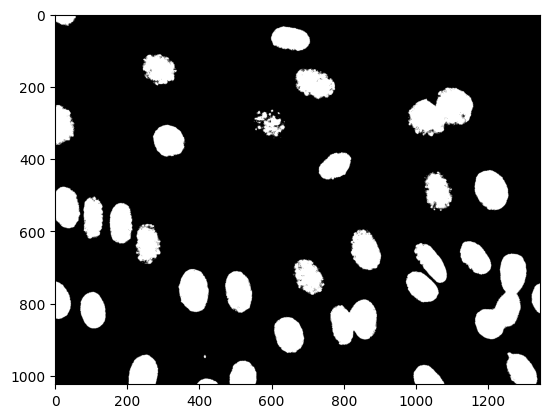

In [17]:

# Compute the segmentation using Otsu's thresholding
segmented_img = np.where(img8 <= optimal_threshold, 0, 255)

# Show the original and segmented images
plt.imshow(segmented_img, "gray")



**[Task 1.6.]()** Compute the Dice coefficient:

In [21]:
ground_truth=plt.imread("data/NIH3T3/gt/0.png")
dice= 2*((segmented_img*ground_truth).sum())/(segmented_img.sum()+ground_truth.sum())
print(dice)

1.986222440186419
